In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load and preprocess data
df = pd.read_csv('12delhi_cleaned.csv')  # Replace 'your_dataset.csv' with your actual dataset filename

# Define labels for heatwave classification based on threshold temperature
threshold_temp = 30  # Example threshold for classifying a day as heatwave
df['Heatwave'] = np.where(df['tmax'] > threshold_temp, 1, 0)

# Prepare data
features = ['tavg', 'tmin', 'tmax', 'prcp']
X = df[features].values
y = df['Heatwave'].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reshape input data for LSTM (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define and compile the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=1, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Classification report
print(classification_report(y_test, y_pred))


C:\Users\subbu\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


298/298 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6378 - loss: 0.5982 - val_accuracy: 0.8348 - val_loss: 0.3742
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy: 0.8348045397225725
              precision    recall  f1-score   support

           0       1.00      0.55      0.71       877
           1       0.79      1.00      0.88      1502

    accuracy                           0.83      2379
   macro avg       0.90      0.78      0.80      2379
weighted avg       0.87      0.83      0.82      2379



In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from datetime import datetime

# Load and preprocess data
df = pd.read_csv('12delhi_cleaned.csv')

# Convert 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

# Sort data by time
df = df.sort_values(by='time')

# Define labels for heatwave classification based on threshold temperature
threshold_temp = 30  # Example threshold for classifying a day as heatwave
df['Heatwave'] = np.where(df['tmax'] > threshold_temp, 1, 0)

# Prepare data
features = ['tavg', 'tmin', 'tmax', 'prcp']
X = df[features].values
y = df['Heatwave'].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reshape input data for LSTM (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define and compile the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=1, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Classification report
print(classification_report(y_test, y_pred))

# Function to predict heatwave for a given date
def predict_heatwave(date_str):
    # Extract features for the given date
    date_data = df[df['time'] == date_str][features].values
    if date_data.size == 0:
        return "Date not found in the dataset"
    date_data_scaled = scaler.transform(date_data)
    date_data_scaled = date_data_scaled.reshape((1, 1, date_data_scaled.shape[1]))
    prediction_prob = model.predict(date_data_scaled)
    prediction = (prediction_prob > 0.5).astype(int)
    return "Heatwave" if prediction == 1 else "No Heatwave"

# Plot temperature over the years
plt.figure(figsize=(14, 7))
plt.plot(df['time'], df['tavg'], label='Average Temperature')
plt.plot(df['time'], df['tmin'], label='Min Temperature')
plt.plot(df['time'], df['tmax'], label='Max Temperature')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Temperature Over the Years')
plt.legend()
plt.show()

# Plot heatwave occurrences over the years
plt.figure(figsize=(14, 7))
plt.plot(df['time'], df['Heatwave'], label='Heatwave Occurrence')
plt.xlabel('Year')
plt.ylabel('Heatwave')
plt.title('Heatwave Occurrences Over the Years')
plt.legend()
plt.show()

# Interactive user input
while True:
    date_str = input("Enter a date (YYYY-MM-DD) to predict heatwave or 'exit' to quit: ")
    if date_str.lower() == 'exit':
        break
    try:
        prediction = predict_heatwave(date_str)
        print(f'Prediction for {date_str}: {prediction}')
    except Exception as e:
        print(f"Error: {e}")


ValueError: time data "13-01-1990" doesn't match format "%m-%d-%Y", at position 12. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

C:\Users\subbu\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.6333 - loss: 0.6823 - val_accuracy: 0.6314 - val_loss: 0.6807
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.6333 - loss: 0.6806 - val_accuracy: 0.6314 - val_loss: 0.6790
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.6333 - loss: 0.6789 - val_accuracy: 0.6314 - val_loss: 0.6774
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.6333 - loss: 0.6772 - val_accuracy: 0.6314 - val_loss: 0.6757
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.6333 - loss: 0.6755 - val_accuracy: 0.6314 - val_loss: 0.6741
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.6333 - loss: 0.6739 - val_accuracy: 0.6314 - val_loss: 0.6724
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.6333 - loss: 0.6722 - val_accuracy: 0.6314 - val_loss: 0.6708
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.6333 - loss: 0.6706 - val_accuracy: 0.6314 - val_loss: 

C:\Users\subbu\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\subbu\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\subbu\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

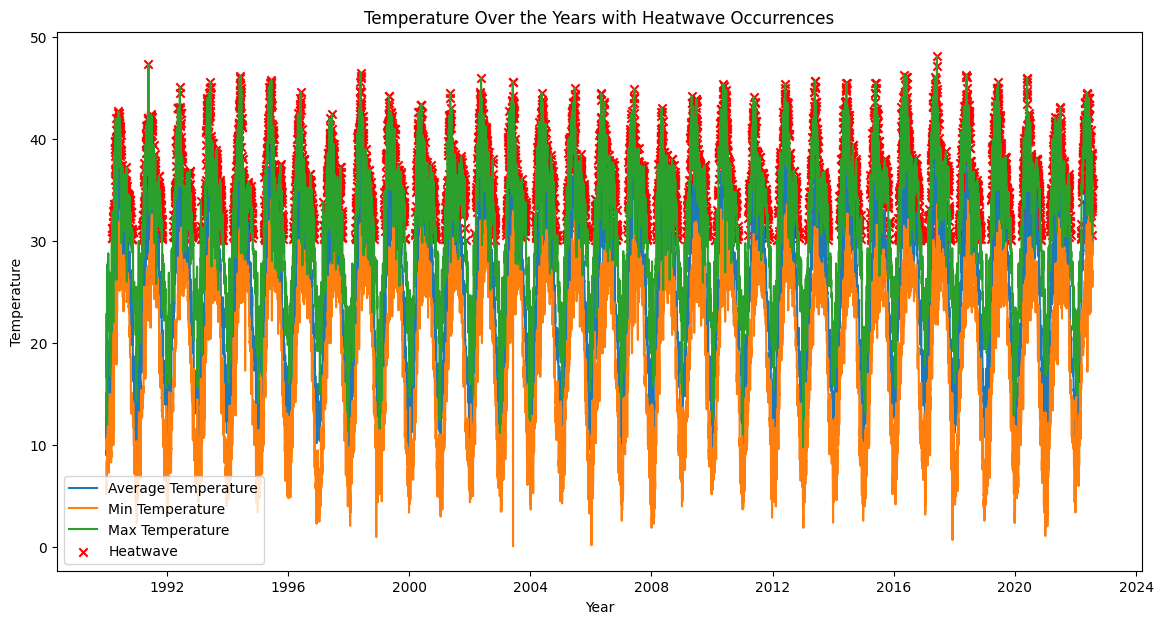

In [1]:
#check this
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Load and preprocess data
df = pd.read_csv('12delhi_cleaned.csv')  

# Convert 'time' column to datetime with the correct format
df['time'] = pd.to_datetime(df['time'], format='%d-%m-%Y')

# Sort data by time
df = df.sort_values(by='time')

# Define labels for heatwave classification based on threshold temperature
threshold_temp = 30  # Example threshold for classifying a day as heatwave
df['Heatwave'] = np.where(df['tmax'] > threshold_temp, 1, 0)

# Prepare data
features = ['tavg', 'tmin', 'tmax', 'prcp']
X = df[features].values
y = df['Heatwave'].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reshape input data for LSTM (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define and compile the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))
\
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=10000, validation_data=(X_test, y_test))

# Evaluate the model
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100}')

# Classification report
print(classification_report(y_test, y_pred))

# Function to predict heatwave for a given date based on historical data
def predict_heatwave(date_str):
    try:
        date = datetime.strptime(date_str, '%Y-%m-%d')
    except ValueError:
        return "Invalid date format. Please use YYYY-MM-DD."
    
    # Using the average of historical data as a placeholder for prediction
    avg_tavg = df['tavg'].mean()
    avg_tmin = df['tmin'].mean()
    avg_tmax = df['tmax'].mean()
    avg_prcp = df['prcp'].mean()
    
    sample = np.array([[avg_tavg, avg_tmin, avg_tmax, avg_prcp]])
    sample_scaled = scaler.transform(sample)
    sample_scaled = sample_scaled.reshape((1, 1, sample_scaled.shape[1]))
    prediction_prob = model.predict(sample_scaled)
    prediction = (prediction_prob > 0.5).astype(int)
    return "Heatwave" if prediction == 1 else "No Heatwave"

# Plot temperature over the years with heatwave occurrences marked
plt.figure(figsize=(14, 7))
plt.plot(df['time'], df['tavg'], label='Average Temperature')
plt.plot(df['time'], df['tmin'], label='Min Temperature')
plt.plot(df['time'], df['tmax'], label='Max Temperature')

# Mark heatwave occurrences with a cross
heatwave_dates = df[df['Heatwave'] == 1]['time']
heatwave_temps = df[df['Heatwave'] == 1]['tmax']
plt.scatter(heatwave_dates, heatwave_temps, color='red', marker='x', label='Heatwave')

plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Temperature Over the Years with Heatwave Occurrences')
plt.legend()
plt.show()

# Interactive user input
while True:
    date_str = input("Enter a date (YYYY-MM-DD) to predict heatwave or 'exit' to quit: ")
    if date_str.lower() == 'exit':
        break
    prediction = predict_heatwave(date_str)
    print(f'Prediction for {date_str}: {prediction}')


C:\Users\subbu\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


952/952 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8901 - loss: 0.4528 - val_accuracy: 0.8949 - val_loss: 0.2780
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy: 0.8949138293400588
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      2129
           1       0.00      0.00      0.00       250

    accuracy                           0.89      2379
   macro avg       0.45      0.50      0.47      2379
weighted avg       0.80      0.89      0.85      2379

 86/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

C:\Users\subbu\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\subbu\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\subbu\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


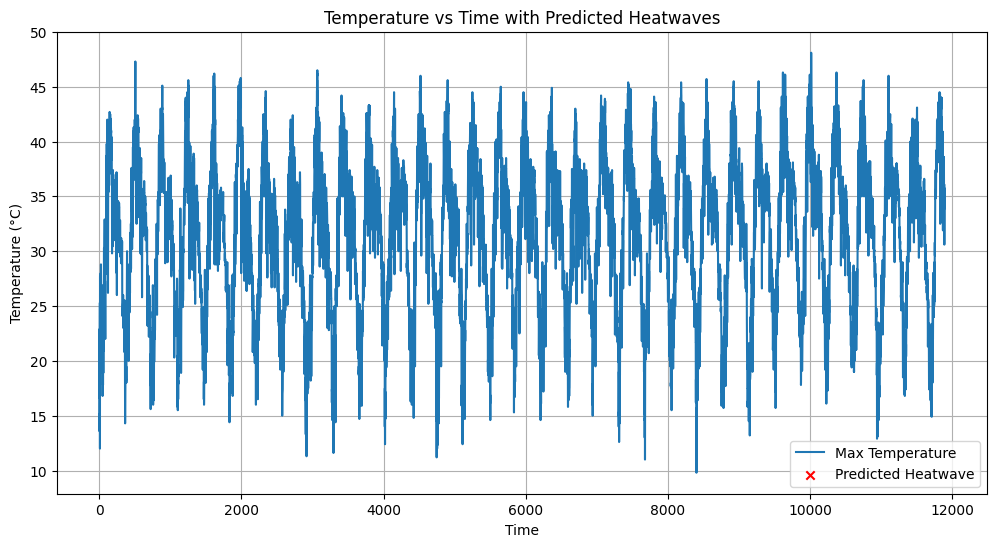

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load and preprocess data
df = pd.read_csv('12delhi_cleaned.csv')  # Replace with your actual dataset filename

# Define labels for heatwave classification based on threshold temperature
threshold_temp = 40  # Example threshold for classifying a day as heatwave
df['Heatwave'] = np.where(df['tmax'] > threshold_temp, 1, 0)

# Prepare data
features = ['tavg', 'tmin', 'tmax', 'prcp']
X = df[features].values
y = df['Heatwave'].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reshape input data for LSTM (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define and compile the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=1, batch_size=10, validation_data=(X_test, y_test))

# Make predictions on test data
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Classification report
print(classification_report(y_test, y_pred))

# Plot predictions on the entire dataset
all_data_X = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))  # Reshape for LSTM input
all_data_y_pred_prob = model.predict(all_data_X)
all_data_y_pred = (all_data_y_pred_prob > 0.5).astype(int)

# Plotting function for temperature vs time with predicted heatwaves marked
def plot_temperature_with_heatwaves(df, predictions):
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['tmax'], label='Max Temperature')
    plt.scatter(df.index[predictions.flatten() == 1], df['tmax'][predictions.flatten() == 1], color='red', marker='x', label='Predicted Heatwave')
    plt.xlabel('Time')
    plt.ylabel('Temperature (°C)')
    plt.title('Temperature vs Time with Predicted Heatwaves')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot temperature vs time with predicted heatwaves marked
plot_temperature_with_heatwaves(df, all_data_y_pred)


C:\Users\subbu\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


298/298 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.6964 - loss: 0.5035 - val_accuracy: 0.9546 - val_loss: 0.1492
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy: 0.9546027742749055
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       877
           1       0.95      0.98      0.96      1502

    accuracy                           0.95      2379
   macro avg       0.96      0.95      0.95      2379
weighted avg       0.95      0.95      0.95      2379



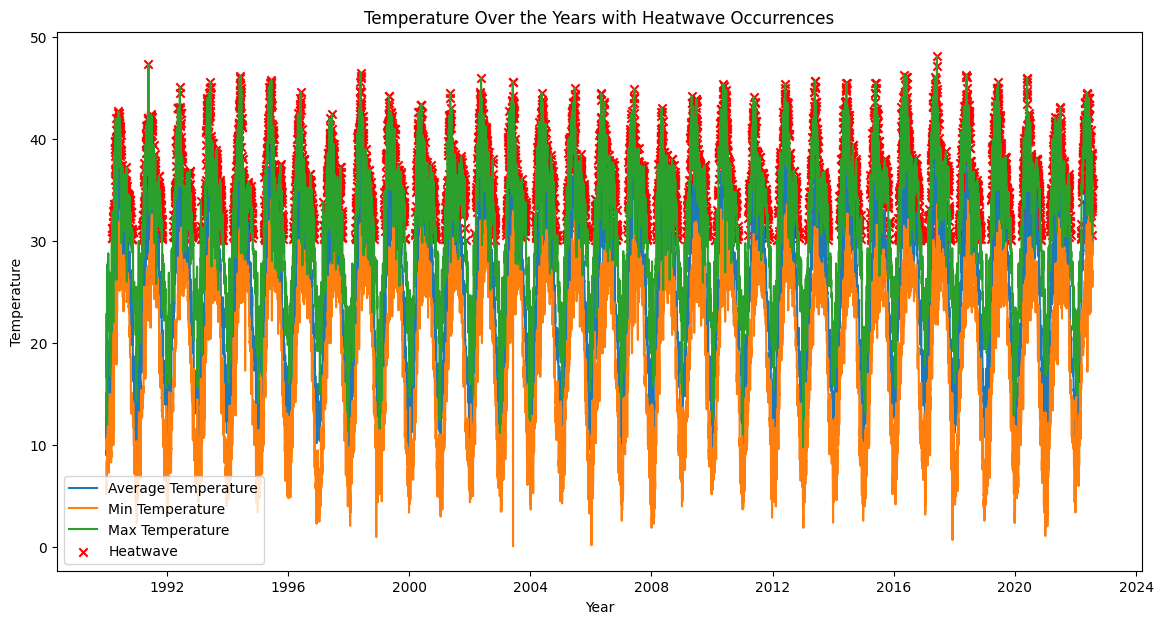

In [13]:
# early stopping
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Load and preprocess data
df = pd.read_csv('12delhi_cleaned.csv')  

# Convert 'time' column to datetime with the correct format
df['time'] = pd.to_datetime(df['time'], format='%d-%m-%Y')

# Sort data by time
df = df.sort_values(by='time')

# Define labels for heatwave classification based on threshold temperature
threshold_temp = 30  # Example threshold for classifying a day as heatwave
df['Heatwave'] = np.where(df['tmax'] > threshold_temp, 1, 0)

# Prepare data
features = ['tavg', 'tmin', 'tmax', 'prcp']
X = df[features].values
y = df['Heatwave'].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reshape input data for LSTM (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define and compile the LSTM model
model = Sequential()
model.add(LSTM(500, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with more epochs and early stopping
model.fit(X_train, y_train, epochs=1, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Classification report
print(classification_report(y_test, y_pred))

# Function to predict heatwave for a given date based on historical data
def predict_heatwave(date_str):
    try:
        date = datetime.strptime(date_str, '%Y-%m-%d')
    except ValueError:
        return "Invalid date format. Please use YYYY-MM-DD."
    
    # Using the average of historical data as a placeholder for prediction
    avg_tavg = df['tavg'].mean()
    avg_tmin = df['tmin'].mean()
    avg_tmax = df['tmax'].mean()
    avg_prcp = df['prcp'].mean()
    
    sample = np.array([[avg_tavg, avg_tmin, avg_tmax, avg_prcp]])
    sample_scaled = scaler.transform(sample)
    sample_scaled = sample_scaled.reshape((1, 1, sample_scaled.shape[1]))
    prediction_prob = model.predict(sample_scaled)
    prediction = (prediction_prob > 0.5).astype(int)
    return "Heatwave" if prediction == 1 else "No Heatwave"

# Plot temperature over the years with heatwave occurrences marked
plt.figure(figsize=(14, 7))
plt.plot(df['time'], df['tavg'], label='Average Temperature')
plt.plot(df['time'], df['tmin'], label='Min Temperature')
plt.plot(df['time'], df['tmax'], label='Max Temperature')

# Mark heatwave occurrences with a cross
heatwave_dates = df[df['Heatwave'] == 1]['time']
heatwave_temps = df[df['Heatwave'] == 1]['tmax']
plt.scatter(heatwave_dates, heatwave_temps, color='red', marker='x', label='Heatwave')

plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Temperature Over the Years with Heatwave Occurrences')
plt.legend()
plt.show()

# Interactive user input
while True:
    date_str = input("Enter a date (YYYY-MM-DD) to predict heatwave or 'exit' to quit: ")
    if date_str.lower() == 'exit':
        break
    prediction = predict_heatwave(date_str)
    print(f'Prediction for {date_str}: {prediction}')
